##Actualizar YahooFinance a última versión

In [63]:
pip install yfinance --upgrade

##Importar librerías

In [64]:
import pandas as pd, yfinance as yf, pytz, seaborn as sns, matplotlib.pyplot as plt
from datetime import datetime, timedelta
print('proceso terminado!'.upper())

PROCESO TERMINADO!


##Cláusulas para identificar tickers

In [65]:
# Opciones de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('future.no_silent_downcasting', True)

# Crear una consulta para obtener las acciones que han cambiado su valor en los últimos 5 minutos
q = yf.EquityQuery('and', [
    yf.EquityQuery('eq', ['region', 'us']), # Acciones de la región de EE. UU. | eq: equal
    # yf.EquityQuery('is-in', ['exchange', 'NMS', 'NYQ']),
    yf.EquityQuery('gt', ['avgdailyvol3m', 950000]),
    yf.EquityQuery('btwn', ['intradayprice', 4.9, 20.9]), # btwn: between
    # yf.EquityQuery('lte', ['intradayprice', 25.9]), # lt: lower than
    # yf.EquityQuery('gte', ['intradayprice', 4.9]), # gt: greater than
    yf.EquityQuery('gt', ['percentchange', 1]) # Cambio porcentual mayor que 0
    # yf.EquityQuery('lte', ['percentchange', -4.99])
])

# Obtener los datos de las acciones que cumplen con la consulta
# response = yf.screen(q, size= 250,sortField='intradayprice', sortAsc=True)
response = yf.screen(q, size= 250,sortField='percentchange', sortAsc=False)
# response = yf.screen(q, size= 250,sortField='percentchange', sortAsc=True)
# response = yf.screen(q, size= 250,sortField='avgdailyvol3m', sortAsc=False)

# Convertir la respuesta a un DataFrame
df = pd.DataFrame(response)
# print(df.shape)
# print(df.to_string())

# Convertir la columna quotes a un DataFrame
quotes_df = pd.DataFrame(df['quotes'].tolist())

# Concatenar el DataFrame original con el nuevo DataFrame de quotes
df = pd.concat([df, quotes_df], axis=1)

# Eliminar la columna quotes original
df = df.drop('quotes', axis=1)
# print(df.columns)

# Resetear el índice
#df = df.reset_index()

df = df[['regularMarketTime','symbol','displayName','longName','regularMarketPrice','regularMarketChangePercent','fiftyTwoWeekRange','fiftyDayAverage',
         'twoHundredDayAverage','averageDailyVolume3Month','quoteType','financialCurrency', 'marketCap','regularMarketVolume','averageDailyVolume10Day',
         'regularMarketOpen','regularMarketDayHigh']]
# df['prop_volumen'] = df['regularMarketVolume'] / df['averageDailyVolume10Day']

# df = df.query("(regularMarketPrice >= 2 & regularMarketPrice <= 30) & financialCurrency == 'USD' & quoteType == 'EQUITY' & marketCap >= 300000000 & prop_volumen >= 0.6")
# df = df.query("financialCurrency == 'USD' & quoteType == 'EQUITY' & marketCap >= 95000000 & & regularMarketVolume >= 999999 & prop_volumen >= 0.1").reset_index()
# df = df.query("financialCurrency == 'USD' & quoteType == 'EQUITY' & (regularMarketPrice / fiftyDayAverage >= 0.75)").reset_index()
# df = df.query("financialCurrency == 'USD' & quoteType == 'EQUITY' & regularMarketPrice > twoHundredDayAverage").reset_index() # Sirve para tendencias fuertes?? seguir estudiando

df = df.query("financialCurrency == 'USD' & "
    "quoteType == 'EQUITY' &"
    "regularMarketDayHigh > fiftyDayAverage &"
    "regularMarketPrice > regularMarketOpen &"
    "marketCap >= 200000000 &"
    "averageDailyVolume10Day >= 1000000").reset_index() # Sirve para tendencias fuertes?? seguir estudiando

# df = df.query("financialCurrency == 'USD' & quoteType == 'EQUITY' & regularMarketPrice < twoHundredDayAverage & marketCap >= 350000000").reset_index() # Entrega mejores tendencias?? seguir estudiando
# df = df.query("financialCurrency == 'USD' & quoteType == 'EQUITY' & regularMarketPrice < fiftyDayAverage & marketCap >= 350000000").reset_index() # Entrega mejores tendencias?? seguir estudiando
# df = df.query("financialCurrency == 'USD' & quoteType == 'EQUITY'").reset_index() # Sigue ofreciendo los resultados de antes
# df = df.query(
#     "financialCurrency == 'USD' & "
#     "quoteType == 'EQUITY' & "
#     "regularMarketPrice > fiftyDayAverage & "
#     "regularMarketPrice > twoHundredDayAverage & "
#     "marketCap >= 350000000 & "
#     "averageDailyVolume3Month > 100000 & "
#     "trailingPE < 20 & "
#     "dividendYield > 2 & "
#     "regularMarketChangePercent > 1"
# ).reset_index() # Para hold largo


# Convertir campos
df['regularMarketTime'] = pd.to_datetime(df['regularMarketTime'], unit='s', utc=True).dt.tz_convert('America/New_York') # Convertir a la zona horaria de Nueva York
df['marketCap'] = df['marketCap'].fillna(0).astype(int)

# print(df.shape)
# print(df.dtypes)

# Eliminar valores de la lista
stock_buscar = df['symbol'].tolist()
# stock_buscar = ['AMZN','MSTR','TSLA']
# valores_eliminar = ['AAIGF','BPAQF','ALTM','CSCCF','GLCNF','SSLZY','MUI','GSAT']
valores_eliminar = ['AAIGF','BPAQF','ALTM','CSCCF','GLCNF','SSLZY','MUI','GSAT','SBH','WKEY','OMI','DV','SITC','FLO','IDAI','KNWND','BHC','DENN','FNMA','PPCB','HUT','SMST']
for valor in valores_eliminar:
    if valor in stock_buscar:
        stock_buscar.remove(valor)

# Validar
print(df.head(20).to_string())
print(f"Total: {len(stock_buscar)} | Nombre de instrumento: {stock_buscar}")
print('proceso terminado!'.upper())

    index         regularMarketTime symbol              displayName                        longName  regularMarketPrice  regularMarketChangePercent fiftyTwoWeekRange  fiftyDayAverage  twoHundredDayAverage  averageDailyVolume3Month quoteType financialCurrency    marketCap  regularMarketVolume  averageDailyVolume10Day  regularMarketOpen  regularMarketDayHigh
0       1 2025-03-11 16:00:01-04:00   LFMD                   LifeMD                    LifeMD, Inc.               5.575                   30.562057      3.99 - 12.88           5.6014              5.826350                    986312    EQUITY               USD    235214256              7181329                  1753010              5.410                 5.810
1       5 2025-03-11 16:00:01-04:00   XNET                   Xunlei                  Xunlei Limited               5.125                   12.885464       1.45 - 5.52           2.7737              2.060370                   1224925    EQUITY               USD    324884000           

##Descargar y formatear datos
*A las 10:35 se identifican mejor los ganadores del día x tendencia*

In [66]:
# Establecer la zona horaria de Nueva York
nueva_york = pytz.timezone('America/New_York')

# Establecer la fecha y hora de inicio y fin
start = datetime(2025, 3, 11, 0, 0, 0, tzinfo=nueva_york) # Año, Mes, Día, Hora, Minuto, Segundo, Zona horaria
end = datetime.now()

# Restar 200 días a la fecha de hoy
# start = datetime.now(nueva_york) - timedelta(days=200)
# end = datetime(2025, 2, 21, 10, 20, 0, tzinfo=nueva_york) # A las 10:19 se identifican mejor las tendencias
# end = datetime(2025, 3, 11, 12, 19, 0, tzinfo=nueva_york) # A las 9:49 primer reporte 15m | + 4 min para validar período 15m

#end = datetime.now() - timedelta(days=3) # Para ayer

# Crear un DataFrame vacío
df_final = pd.DataFrame(columns=['Ticker', 'Fecha', 'Close', 'Volume', 'High', 'Low', '%_cambio'])

# Crear un DataFrame vacío para almacenar los resultados de cambio_jornada
df_cambio_jornada = pd.DataFrame(columns=['Ticker', 'Cambio_Jornada'])

for a in stock_buscar:
    try:
        data = yf.download(tickers=a, start=start, end=end, interval="15m")
        print(f"\nData collection successful for: {a}")
    except:
        print("Failure in download")

    df1 = pd.DataFrame(data)

    # df1.index = df1.index.tz_localize(nueva_york)  # Comentado!
    df1.index = df1.index.tz_convert(nueva_york)  # Comentado!

    # Resetear el índice
    df1 = df1.reset_index()

    df1.columns = ['Fecha', 'Close', 'High', 'Low', 'Open', 'Volume']
    df1 = df1[['Fecha', 'Close', 'High', 'Low','Volume']]
    df1['Ticker'] = a

    # # Agregar columna para indicar si se cumple la condición de compra
    # df1['Compra'] = False

    # # Iterar sobre los grupos de tres filas
    # df1['Compra'] = False

    # # Iterar sobre los grupos de tres filas
    # for i in range(len(df1) - 2):
    #     if df1['Ticker'].iloc[i] == df1['Ticker'].iloc[i + 1] == df1['Ticker'].iloc[i + 2]:
    #         if df1['Close'].iloc[i+2] >= df1['Close'].iloc[i+1] and df1['Close'].iloc[i+2] > df1['Close'].iloc[i]:
    #             df1.loc[i + 2, 'Compra'] = True

    df1['%_cambio'] = round(df1['Close'].pct_change() * 100,3)
    df1['High'] = round(df1['High'],3)
    df1['Low'] = round(df1['Low'],3)
    df1['Close'] = round(df1['Close'],3)

    # Agregar resultado a df_final
    df_final = pd.concat([df_final.dropna(how='all'), df1.dropna(how='all')], ignore_index=True)

    # Agregar resultado a df_cambio_jornada
    cambio_jornada = round(df1.groupby('Ticker')['%_cambio'].sum(), 2)
    df_cambio_jornada = pd.concat([df_cambio_jornada.dropna(how='all'), pd.DataFrame({'Ticker': [a], 'Cambio_Jornada': [cambio_jornada.iloc[0]]})], ignore_index=True)

# Mensaje
print('proceso terminado!'.upper())

[*********************100%***********************]  1 of 1 completed


Data collection successful for: LFMD



<ipython-input-66-af4a99fab57a>:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_final = pd.concat([df_final.dropna(how='all'), df1.dropna(how='all')], ignore_index=True)
<ipython-input-66-af4a99fab57a>:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_cambio_jornada = pd.concat([df_cambio_jornada.dropna(how='all'), pd.DataFrame({'Ticker': [a], 'Cambio_Jornada': [cambio_jornada.iloc[0]]})], ignore_index=True)
[*********************100%***********************]  1 of 1 completed



Data collection successful for: XNET


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Data collection successful for: OCUL

Data collection successful for: AG


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Data collection successful for: SLDB

Data collection successful for: ARQT

Data collection successful for: ARDX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Data collection successful for: FSM

Data collection successful for: KGC

Data collection successful for: HL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Data collection successful for: EQX

Data collection successful for: EYE

Data collection successful for: API


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Data collection successful for: ADMA

Data collection successful for: SSRM

Data collection successful for: TIGR


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Data collection successful for: CRK

Data collection successful for: TRVI

Data collection successful for: CSTM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Data collection successful for: GFI

Data collection successful for: ORGO

Data collection successful for: HIT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Data collection successful for: AIV

Data collection successful for: ALHC

Data collection successful for: BKD


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Data collection successful for: FLG

Data collection successful for: GENI

Data collection successful for: SAND


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Data collection successful for: SAGE

Data collection successful for: AES

Data collection successful for: AMRX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data collection successful for: AUPH

Data collection successful for: GOLD
PROCESO TERMINADO!


##Calcular VWAP (Volume-Weighted Average Price)

In [67]:
# Fuente VWAP Definition: https://tinyurl.com/22dp95x6

# Valor típico
df_final['TypicalPrice'] = (((df_final['High'] + df_final['Low'] + df_final['Close']) / 3) * df_final['Volume'])

# Convertir a númerico
df_final['TypicalPrice'] = pd.to_numeric(df_final['TypicalPrice'], errors='coerce')
df_final['Volume'] = pd.to_numeric(df_final['Volume'], errors='coerce')

# Cálculo de VWAP
df_final['VWAP'] = round(df_final.groupby('Ticker')['TypicalPrice'].cumsum() / df_final.groupby('Ticker')['Volume'].cumsum(),3)
# df_final['vChk'] = df_final['Close'] > df_final['VWAP']

# Formatear TypicalPrice a 3 decimales como string
df_final['TypicalPrice'] = df_final['TypicalPrice'].apply(lambda x: f"{x:.3f}" if pd.notnull(x) else x)

# Filtrar por condición de VWAP = True
# ultimas_filas = df_final.sort_values('Fecha').groupby('Ticker').tail(1)
# tickers_a_eliminar = ultimas_filas[~ultimas_filas['vChk']]['Ticker'].unique()
# df_final = df_final[~df_final['Ticker'].isin(tickers_a_eliminar)]

# Validar resultado
# print(df_final.to_string())
# df_final.query("Ticker == 'MPW'")
# print(df_final.head(15).to_string())

# Mensaje
print('proceso terminado!'.upper())

PROCESO TERMINADO!


##Calcular EMA 9, 20 y 200 (Exponential Moving Average)
*Los filtros / True sería: Pr close > EMA 200 & VWAP & EMA 20 (& EMA 9[Opt])*

In [68]:
# Fuente What is Exponential Moving Average? Definition, Formula, Calculation, and Trading: https://www.strike.money/technical-analysis/ema
# Fuente Calculating EMA for Tesla Stock Using Pandas: https://tinyurl.com/2bjlzbjp
# Fuente Simple EMA Crossover trading signals using pandas: https://tinyurl.com/2ayxfqjl

# Función para calcular las EMA
def calcular_ema(df, ticker, periodo):
    return round(df.groupby(ticker)['Close'].transform(lambda x: x.ewm(span=periodo, adjust=False).mean()),3)

# EMA's a calcular según período
df_final['EMA9'] = calcular_ema(df_final, 'Ticker', 9)
df_final['EMA20'] = calcular_ema(df_final, 'Ticker', 20)
df_final['EMA200'] = calcular_ema(df_final, 'Ticker', 200)

# Columna True
df_final['Compra'] = (df_final['Close'] > df_final['VWAP']) & (df_final['Close'] > df_final['EMA200']) & (df_final['Close'] >= df_final['EMA20']) & (df_final['Close'] >= df_final['EMA9'])

# Validar resultado
# print(df_final.head(15).to_string())

# Mensaje
print('proceso terminado!'.upper())

PROCESO TERMINADO!


##Df final con datos [Yf DB]

In [69]:
# Mostrar los datos descargados
# print(df_cambio_jornada.to_string())
# df_final.head(15)
print(df_final.head(15).to_string())

# Consulta
# stock = ['gv','tuya','rily', 'agh']  # Use a list instead of a tuple
# consulta = df_final[df_final['Ticker'].str.upper().isin([s.upper() for s in stock])]
# print(consulta.to_string())

# Mensaje
print('proceso terminado!'.upper())

   Ticker                     Fecha  Close   Volume   High    Low  %_cambio TypicalPrice   VWAP   EMA9  EMA20  EMA200  Compra
0    LFMD 2025-03-11 09:30:00-04:00  4.970  1784059  5.750  4.960       NaN  9324681.707  5.227  4.970  4.970   4.970   False
1    LFMD 2025-03-11 09:45:00-04:00  5.240   562802  5.290  4.938     5.433  2901807.112  5.210  5.024  4.996   4.973    True
2    LFMD 2025-03-11 10:00:00-04:00  5.310   467492  5.435  5.191     1.336  2483317.504  5.227  5.081  5.026   4.976    True
3    LFMD 2025-03-11 10:15:00-04:00  5.250   371634  5.510  5.200    -1.130  1977092.880  5.238  5.115  5.047   4.979    True
4    LFMD 2025-03-11 10:30:00-04:00  5.260   215360  5.280  5.140     0.190  1125614.933  5.237  5.144  5.067   4.982    True
5    LFMD 2025-03-11 10:45:00-04:00  5.150   138427  5.270  5.061    -2.091   714329.462  5.234  5.145  5.075   4.983   False
6    LFMD 2025-03-11 11:00:00-04:00  5.355   209795  5.380  5.120     3.981  1108766.575  5.237  5.187  5.102   4.987 

##Top 10 de mayores cambios

In [70]:
df_cambio_jornada = df_cambio_jornada.sort_values('Cambio_Jornada',ascending=False).reset_index(drop=True)
df_cambio_jornada.head(15)

,Ticker,Cambio_Jornada
0,LFMD,11.93
1,SLDB,9.72
2,EYE,6.22
3,TRVI,4.82
4,ARDX,4.80
5,ARQT,4.62
6,SAGE,4.35
7,CSTM,3.84
8,HIT,3.13
9,ALHC,3.07


##Df categórico [Transpuesto]

In [71]:
# Agrupar por 'Ticker' y 'Fecha', y luego pivotar
pivot_df = df_final.pivot_table(index='Ticker', columns='Fecha', values='Compra', aggfunc='first', fill_value=False)

# Mostrar el DataFrame resultante
pivot_df

# Unir DataFrames a partir de la columna Ticker
df_unido = pd.merge(pivot_df, df_cambio_jornada, on='Ticker')
df_unido['symbol'] = df_unido['Ticker']
df_unido = pd.merge(df_unido, df[['symbol', 'regularMarketPrice']], on='symbol')

# Take profit
df_unido['TP'] = ((df_unido['regularMarketPrice'] * 0.0166) + df_unido['regularMarketPrice']).round(2).astype(str)
# Stop Loss
df_unido['SL'] = ((df_unido['regularMarketPrice'] * 0.0125) - df_unido['regularMarketPrice']).round(2).astype(str)

# Precio
df_unido['regularMarketPrice'] = df_unido['regularMarketPrice'].astype(str)

# Renombrar columnas
df_unido = df_unido.rename(columns={'regularMarketPrice': 'Precio'})
df_unido = df_unido.rename(columns={'Cambio_Jornada': 'Cambio'})
df_unido = df_unido.drop('symbol', axis=1)

# Seleccionar columnas que contienen el caracter ":" y contar True
columnas_con_punto_y_coma = [col for col in df_unido.columns if ":" in str(col)]
df_unido['T'] = df_unido[columnas_con_punto_y_coma].apply(lambda x: x.sum(), axis=1).astype(str)

# Ordenar
df_unido = df_unido.sort_values('Cambio',ascending=False).reset_index(drop=True)

# Define una función que extrae la hora y el minuto de un nombre de columna
def extraer_hora_minuto(columna):
    return columna.split(' ')[1][:5]

# Selecciona solo las columnas que cumplan con la condición
columnas_fecha = df_unido.filter(regex=r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}-\d{2}:\d{2}').columns

# Crea nuevas columnas con la hora y el minuto
for columna in columnas_fecha:
    # Convierte el nombre de la columna a texto
    nombre_columna = str(columna)
    # Extrae la hora y el minuto
    hora_minuto = extraer_hora_minuto(nombre_columna)
    # Renombra la columna con la hora y el minuto
    df_unido = df_unido.rename(columns={columna: hora_minuto})

# Definir una función para colorear las celdas con valor True
def colorear_celdas(val):
    if isinstance(val, bool):
        color = '#599060' if val else 'white'
    elif isinstance(val, (int, float)):
        if val > 3:
            color = '#50989c'
        elif val > 1:
            color = '#70b578'  # verde más intenso
        elif val > 0:
            color = '#525252'  # verde claro
        else:
            color = '#ff6666'
    else:
        color = 'black'
    return f'background-color: {color}'

# Consultas
df_unido = df_unido.head(15)
# stock = ['fold', 'coty', 'sono']  # Use a list instead of a tuple
# df_unido = df_unido[df_unido['Ticker'].str.upper().isin([s.upper() for s in stock])]
# df_unido = df_unido.query("T >= '2'")

# Aplicar estilo a dataframe
styled_df = df_unido.style.map(colorear_celdas)
styled_df # Mostrar el resultado

# Seleccionar las 14 últimas columnas, conservando la primera
# columnas_seleccionadas = ['Ticker'] + list(df_unido.columns[-16:])
# styled_df_seleccionado = df_unido[columnas_seleccionadas].style.map(colorear_celdas) # Mostrar columnas seleccionadas
# styled_df_seleccionado # Mostrar el resultado

,Ticker,09:30,09:45,10:00,10:15,10:30,10:45,11:00,11:15,11:30,11:45,12:00,12:15,12:30,12:45,13:00,13:15,13:30,13:45,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,Cambio,Precio,TP,SL,T
0,LFMD,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,11.930000,5.575,5.67,-5.51,23
1,SLDB,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,9.720000,5.61,5.7,-5.54,7
2,EYE,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,6.220000,12.22,12.42,-12.07,22
3,TRVI,False,False,True,True,True,False,True,False,True,True,False,True,True,True,False,False,False,False,True,True,True,True,True,True,True,False,4.820000,6.3,6.4,-6.22,16
4,ARDX,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,4.800000,5.62,5.71,-5.55,10
5,ARQT,False,False,False,False,False,False,False,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,4.620000,15.49,15.75,-15.3,16
6,SAGE,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,4.350000,7.4,7.52,-7.31,19
7,CSTM,False,False,False,False,False,False,True,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,3.840000,11.84,12.04,-11.69,17
8,HIT,False,True,True,True,False,True,True,True,True,True,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,3.130000,7.46,7.58,-7.37,19
9,ALHC,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,3.070000,15.42,15.68,-15.23,20


##Df Númerico [Transpuesto]

In [72]:
# Agrupar por 'Ticker' y 'Fecha', y luego pivotar
pivot_df = df_final.pivot_table(index='Ticker', columns='Fecha', values='%_cambio', aggfunc='first', fill_value=False)

# Mostrar el DataFrame resultante
# print(pivot_df.to_string())
# print(df_cambio_jornada.to_string())

# Unir DataFrames a partir de la columna Ticker
df_unido = pd.merge(pivot_df, df_cambio_jornada, on='Ticker')
df_unido['symbol'] = df_unido['Ticker']
df_unido = pd.merge(df_unido, df[['symbol', 'regularMarketPrice']], on='symbol')

# Take profit
df_unido['TP'] = ((df_unido['regularMarketPrice'] * 0.075) + df_unido['regularMarketPrice']).round(2).astype(str)
# Stop Loss
df_unido['SL'] = ((df_unido['regularMarketPrice'] * 0.02) - df_unido['regularMarketPrice']).round(2).astype(str)

# Precio
df_unido['regularMarketPrice'] = df_unido['regularMarketPrice'].astype(str)

# Renombrar columnas
df_unido = df_unido.rename(columns={'regularMarketPrice': 'Precio'})
df_unido = df_unido.rename(columns={'Cambio_Jornada': 'Cambio'})
df_unido = df_unido.drop('symbol', axis=1)

# Ordenar
df_unido = df_unido.sort_values('Cambio',ascending=False).reset_index(drop=True)
# print(df_unido.to_string())


# Define una función que extrae la hora y el minuto de un nombre de columna
def extraer_hora_minuto(columna):
    return columna.split(' ')[1][:5]

# Selecciona solo las columnas que cumplan con la condición
columnas_fecha = df_unido.filter(regex=r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}-\d{2}:\d{2}').columns

# Crea nuevas columnas con la hora y el minuto
for columna in columnas_fecha:
    # Convierte el nombre de la columna a texto
    nombre_columna = str(columna)
    # Extrae la hora y el minuto
    hora_minuto = extraer_hora_minuto(nombre_columna)
    # Renombra la columna con la hora y el minuto
    df_unido = df_unido.rename(columns={columna: hora_minuto})

# Definir una función para colorear las celdas con valor True
def colorear_celdas(val):
    if isinstance(val, (int, float)):
        if val > 1.5:
            color = '#385a3c'  # verde más fuerte
        elif val > 0.33:
            color = '#70b578'  # verde muy claro
        elif val > -0.33:
            color = '#FFFFFF'  # fondo blanco
        elif val > -1.5:
            color = '#ff6666'  # rojo muy claro
        else:
            color = '#990000'  # rojo muy oscuro
    else:
        color = 'black'
    return f'background-color: {color}'

# Consultas
# print(df_unido.to_string())
df_unido = df_unido.head(15)
# stock = ['fold', 'coty', 'sono']  # Use a list instead of a tuple
# df_unido = df_unido[df_unido['Ticker'].str.upper().isin([s.upper() for s in stock])]
# df_unido = df_unido.query("T >= '2'")

# Aplicar estilo a dataframe
styled_df = df_unido.style.map(colorear_celdas)
styled_df # Mostrar el resultado

# Seleccionar las 14 últimas columnas, conservando la primera
# columnas_seleccionadas = ['Ticker'] + list(df_unido.columns[-12:])
# styled_df_seleccionado = df_unido[columnas_seleccionadas].style.map(colorear_celdas) # Mostrar columnas seleccionadas
# styled_df_seleccionado # Mostrar el resultado

,Ticker,09:45,10:00,10:15,10:30,10:45,11:00,11:15,11:30,11:45,12:00,12:15,12:30,12:45,13:00,13:15,13:30,13:45,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,Cambio,Precio,TP,SL
0,LFMD,5.433000,1.336000,-1.130000,0.190000,-2.091000,3.981000,-1.401000,4.356000,-1.815000,-0.823000,0.457000,1.763000,1.149000,-1.121000,0.857000,0.311000,-1.171000,0.696000,0.485000,3.632000,-1.071000,-1.230000,0.977000,0.442000,-2.281000,11.930000,5.575,5.99,-5.46
1,SLDB,-1.961000,-0.200000,-2.104000,1.535000,-0.605000,-0.406000,-0.305000,0.613000,0.508000,-0.404000,1.217000,0.000000,-0.501000,-0.403000,-0.708000,0.509000,1.114000,1.703000,0.493000,2.549000,2.008000,0.187000,1.991000,1.809000,1.081000,9.720000,5.61,6.03,-5.5
2,EYE,0.000000,-0.435000,0.524000,1.087000,0.215000,0.730000,0.426000,0.552000,-0.084000,-0.422000,-0.127000,-0.212000,0.596000,-0.169000,0.508000,0.253000,0.421000,1.047000,0.414000,1.940000,-0.486000,0.000000,0.163000,0.487000,-1.213000,6.220000,12.22,13.14,-11.98
3,TRVI,-2.492000,3.407000,0.494000,0.164000,-2.946000,3.204000,-1.959000,2.165000,-1.142000,-1.647000,1.507000,1.102000,-0.273000,-1.148000,-0.498000,0.500000,-0.498000,2.742000,0.008000,2.190000,3.776000,-0.121000,-2.106000,-0.508000,-1.101000,4.820000,6.3,6.77,-6.17
4,ARDX,-0.746000,-0.940000,-0.380000,-0.190000,-0.286000,1.244000,0.095000,0.661000,-0.938000,-0.568000,0.952000,0.189000,-0.094000,-0.188000,0.000000,1.226000,0.095000,0.559000,0.741000,1.472000,-0.027000,1.025000,0.180000,0.269000,0.447000,4.800000,5.62,6.04,-5.51
5,ARQT,-1.014000,-0.171000,-0.958000,0.276000,-0.482000,1.730000,0.408000,0.203000,0.203000,-0.472000,0.915000,0.974000,0.266000,0.265000,-0.066000,0.530000,-0.066000,2.109000,-1.420000,1.310000,-0.711000,-1.009000,1.085000,0.130000,0.585000,4.620000,15.49,16.65,-15.18
6,SAGE,-0.176000,1.131000,-0.208000,0.139000,0.701000,0.068000,-0.139000,-0.208000,0.348000,-1.180000,0.097000,0.114000,0.000000,-0.350000,0.633000,0.280000,-0.070000,0.837000,0.484000,0.551000,-0.205000,-0.206000,0.481000,0.547000,0.680000,4.350000,7.4,7.96,-7.25
7,CSTM,-0.351000,0.220000,-0.747000,-0.487000,1.156000,0.527000,-0.350000,0.219000,0.876000,-0.738000,0.481000,1.001000,-0.086000,0.000000,-0.561000,0.347000,0.432000,0.473000,0.514000,1.619000,0.629000,-0.708000,0.336000,0.293000,-1.251000,3.840000,11.84,12.73,-11.6
8,HIT,2.075000,-0.813000,-0.205000,-0.342000,0.549000,0.820000,0.271000,0.676000,-0.268000,-0.404000,-0.135000,-0.541000,0.136000,-0.761000,0.082000,0.137000,0.956000,0.271000,0.270000,0.673000,1.337000,-1.121000,-0.267000,-0.201000,-0.067000,3.130000,7.46,8.02,-7.31
9,ALHC,-0.803000,0.674000,0.603000,0.932000,0.462000,1.313000,0.421000,-0.161000,-0.323000,-0.649000,0.261000,-0.260000,0.392000,0.195000,0.260000,0.453000,-0.258000,0.904000,0.416000,0.287000,-0.381000,-0.287000,-0.512000,-0.322000,-0.549000,3.070000,15.42,16.58,-15.11


##Graficar comportamiento: 1-Cambio

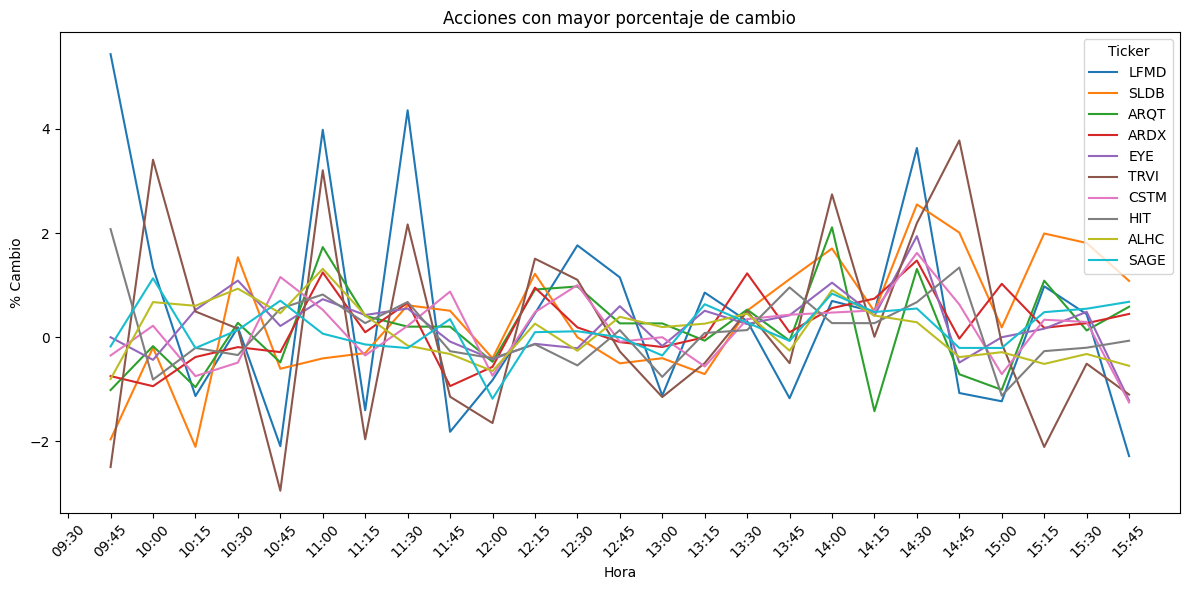

In [73]:
# Seleccionar las 5 acciones de mayor cambio
df_cambio_jornada_gr = df_cambio_jornada.head(10)

# Filtrar dataframe para que contenga solo los tickers de mayor cambio
df_grafico = df_final[df_final['Ticker'].isin(df_cambio_jornada_gr['Ticker'])].copy()  # Crear copia

# Conservar la hora del campo Fecha
df_grafico['Fecha'] = df_grafico['Fecha'].astype(str).apply(lambda x: x.split(' ')[1][:5])

# Grafica
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grafico, x='Fecha', y='%_cambio', hue='Ticker', marker=None)

# Ajustes del gráfico
plt.title('Acciones con mayor porcentaje de cambio')
plt.xlabel('Hora')
plt.ylabel('% Cambio')
plt.xticks(rotation=45)
plt.legend(title='Ticker')
plt.tight_layout()

# Muestra el gráfico
plt.show()

##Graficar comportamiento: 2-Precio

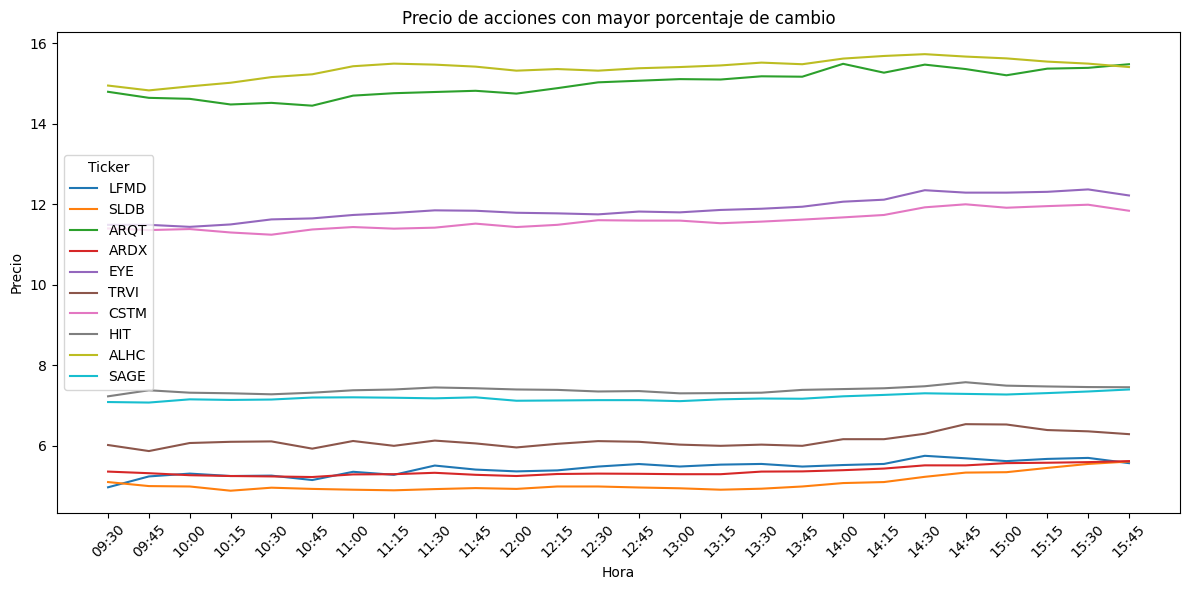

In [74]:
# Grafica
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grafico, x='Fecha', y='Close', hue='Ticker', marker=None)

# Ajustes del gráfico
plt.title('Precio de acciones con mayor porcentaje de cambio')
plt.xlabel('Hora')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.legend(title='Ticker')
plt.tight_layout()

# Muestra el gráfico
plt.show()